In [2]:
import utils as ut

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
import sys, os

In [3]:
home = os.path.expanduser("~")
project_path =  os.path.relpath("..")
if project_path not in sys.path:
    sys.path.append(project_path)

sys.path.insert(1, project_path)
output_folder= project_path+'/outputs/'

In [4]:
%load_ext autoreload

In [5]:
%autoreload
reference_date = pd.to_datetime('2020-01-01')
syn_clade_stats = ut.get_clade_stats_dataframe('syn_clade_stats_SARS_CoV_2',reference_date=reference_date)

In [6]:

nonsyn_RBD_clade_stats = ut.get_clade_stats_dataframe('RBD_clade_stats_SARS_CoV_2',reference_date=reference_date)


In [7]:
%autoreload
df_reworked = ut.get_df_reworked(fname='fitness_france_def.txt', reference_date=reference_date)

/Users/dennytrimcev/Dropbox/Work_Main/onset_antigenic_evolution/6_data_stuff/utils.py:208: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_reworked = pd.concat([df_reworked,pd.concat( [pd.DataFrame(extra_col,columns=['clade']),df_vals],axis=1)],axis=0)


In [8]:
from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
%autoreload
covid_data_World = ut.get_covid_data_World(reference_date)
day_diff_weekly = covid_data_World['day_diff'][::7]

In [11]:
import scipy.optimize as so

x such that ratio>2 for nonsyn RBD: 2.01e-02


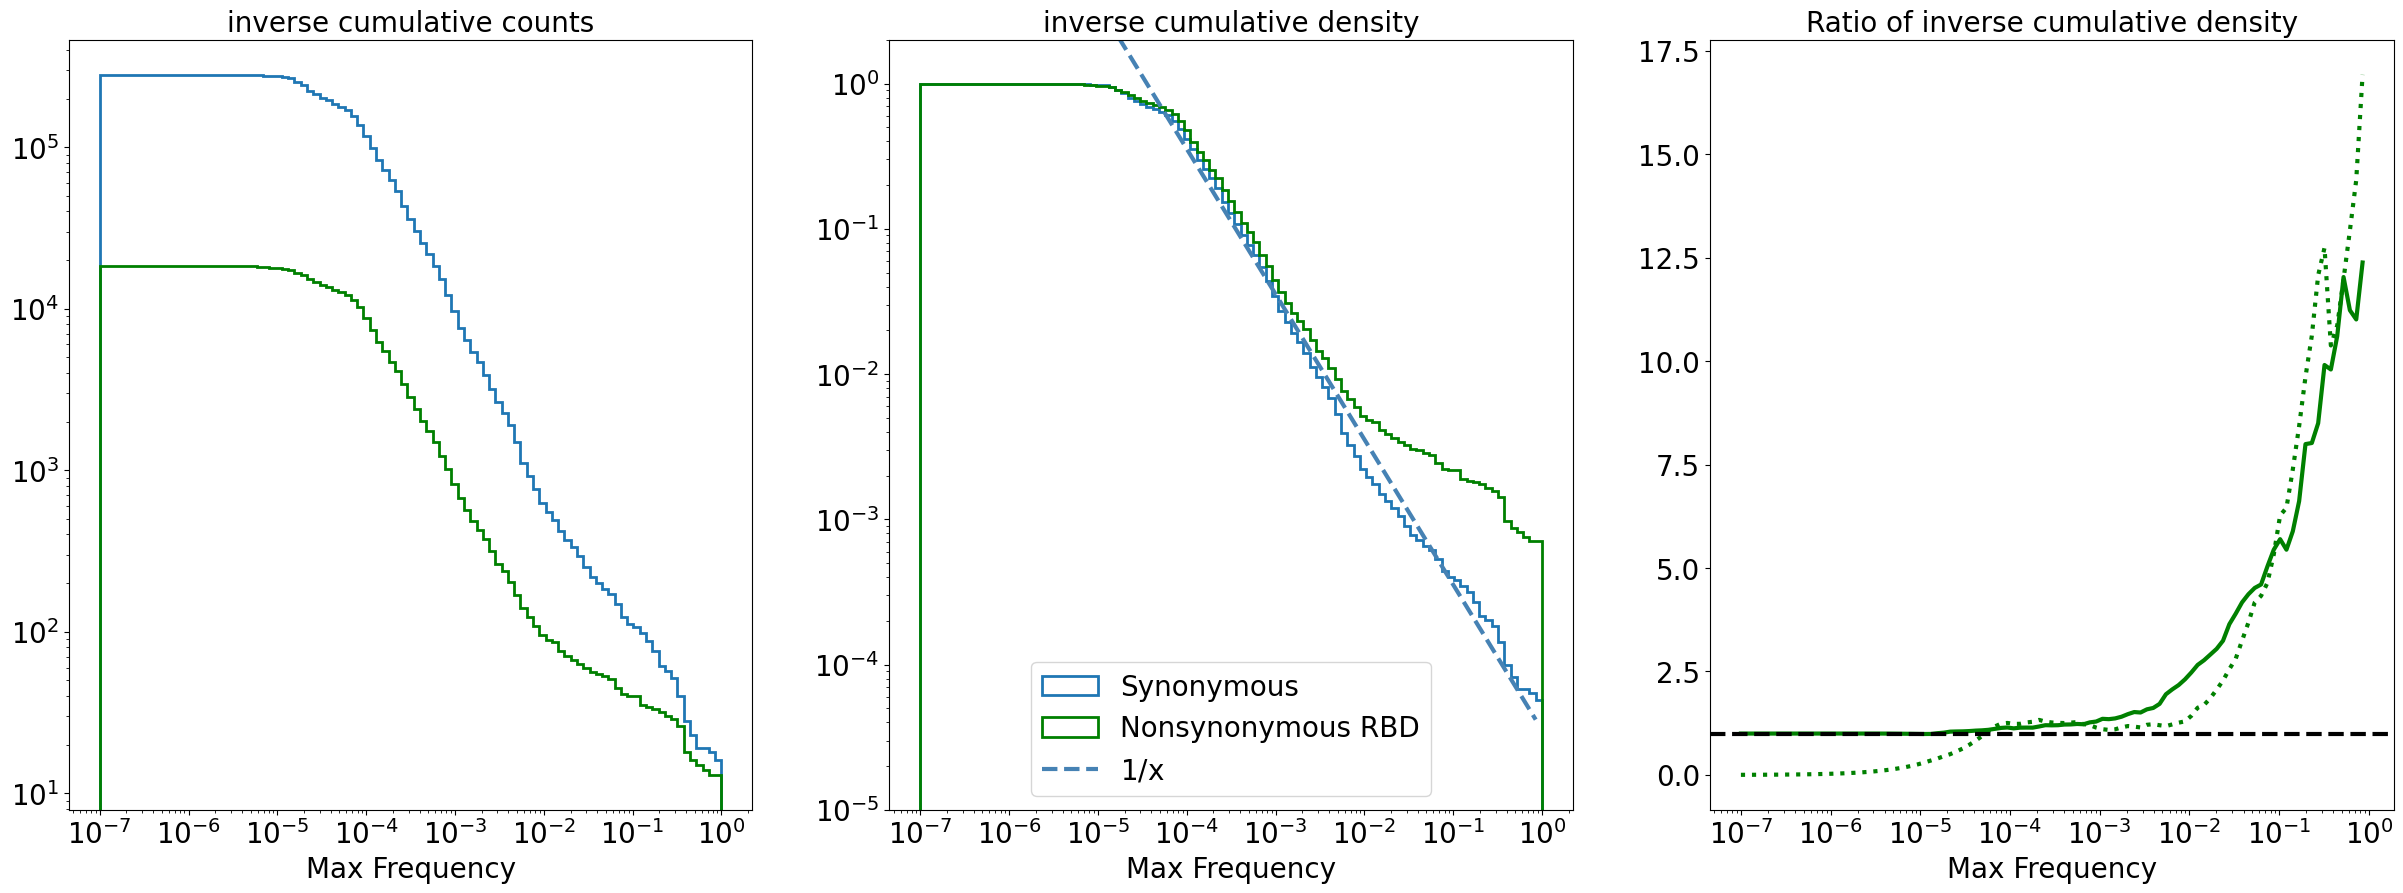

In [30]:
fig, ax = plt.subplots(1,3,figsize = (30,10))

syn_h_counts,syn_b_counts,syn_p_counts = ax[0].hist(syn_clade_stats['Max_Freq'], bins = np.logspace(-7,0,100), density = False, alpha = 1, lw=2, label = 'Synonymous',cumulative=-1, histtype = 'step')

nonsyn_RBD_h_counts,nonsyn_RBD_b_counts,nonsyn_RBD_p_counts = ax[0].hist(nonsyn_RBD_clade_stats['Max_Freq'], bins = np.logspace(-7,0,100), density = False, alpha = 1, lw=2, label = 'Nonsynonymous RBD',cumulative=-1, histtype = 'step',color='green')

ax[0].set_xscale('log')
ax[0].set_yscale('log')

syn_h,syn_b,syn_p = ax[1].hist(syn_clade_stats['Max_Freq'], bins = np.logspace(-7,0,100), density = True, alpha = 1, lw=2, label = 'Synonymous',cumulative=-1, histtype = 'step')

nonsyn_RBD_h,nonsyn_RBD_b,nonsyn_RBD_p = ax[1].hist(nonsyn_RBD_clade_stats['Max_Freq'], bins = np.logspace(-7,0,100), density = True, alpha = 1, lw=2, label = 'Nonsynonymous RBD',cumulative=-1, histtype = 'step',color='green')

#fit syn with b/(1+a x)
fitfunc = lambda x,a,b: b/(1+a*x)
popt, pcov = so.curve_fit(fitfunc, syn_b[50:-1],syn_h[50:])
a,b = popt
one_over_x_fit = fitfunc(syn_b[:-1],a,b)
ax[1].plot(syn_b[:-1],one_over_x_fit, label = r'$1/x$',color='steelblue',linestyle='--')
ax[1].legend(loc='best',fontsize=20)
ax[2].plot(syn_b[:-1],nonsyn_RBD_h/syn_h, label = 'Nonsynonymous RBD',color='green')

ax[2].plot(syn_b[:-1],nonsyn_RBD_h/one_over_x_fit,color='green',ls= ':')

print(f'x such that ratio>2 for nonsyn RBD: {syn_b[np.argwhere(nonsyn_RBD_h/one_over_x_fit>2)[0][0]]:.2e}')

ax[1].set_ylim(top = 2, bottom = 1e-5)   

ax[2].axhline(1,linestyle='--',color='black')

ax[1].set_xscale('log')
ax[1].set_yscale('log')
# ax[1].set_ylim(10,50)

ax[2].set_xscale('log')

ax[0].set_xlabel('Max Frequency',fontsize=20)
ax[0].set_title('inverse cumulative counts',fontsize=20)

ax[1].set_xlabel('Max Frequency',fontsize=20)
ax[1].set_title('inverse cumulative density',fontsize=20)

ax[2].set_xlabel('Max Frequency',fontsize=20)
ax[2].set_title('Ratio of inverse cumulative density',fontsize=20)
for a in ax:
    a.tick_params(axis='both', which='major', labelsize=20)

In [20]:
u_neutr = 3e-3 #per nucleotide per year
Lg = 3e4 #genome length

U_syn = u_neutr*Lg *1/3 #per genome per year
u_nonsyn = u_neutr*2/3

(100.0, 2000.0)

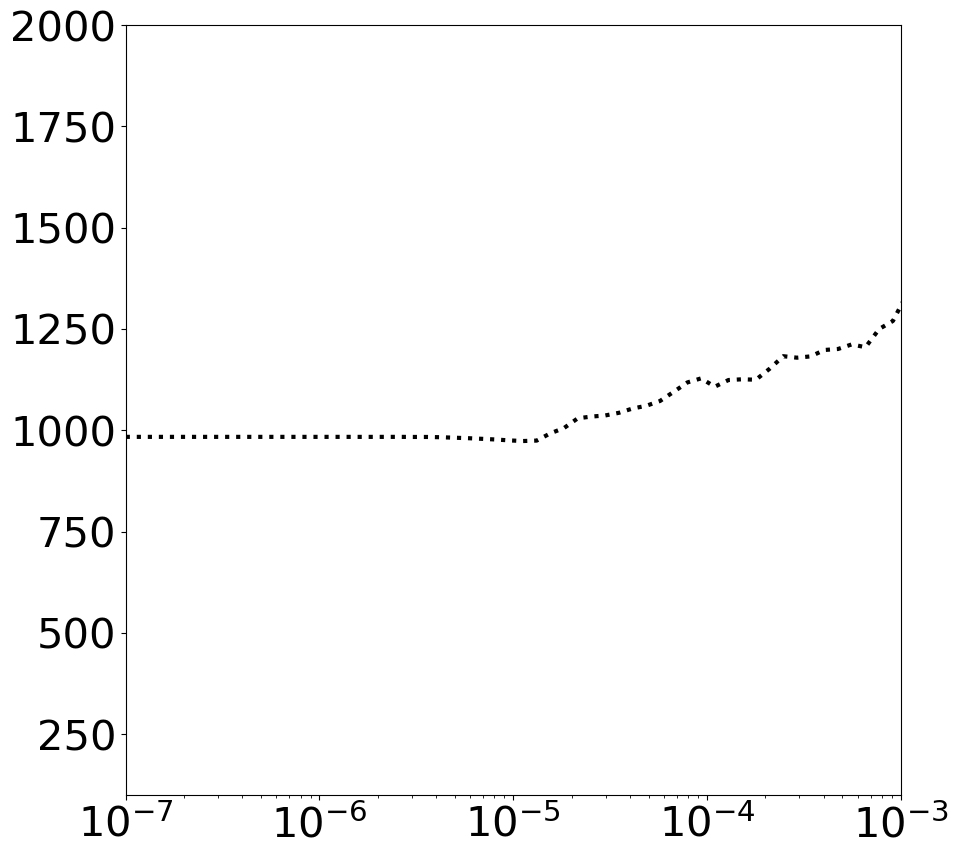

In [44]:
fig,ax= plt.subplots(1,1,figsize=(10,10))

ax.plot(syn_b[:-1],Lg* nonsyn_RBD_h_counts/syn_h_counts /2 ,color='black',ls= ':',label='Nonsynonymous RBD')
ax.set_xscale('log')
ax.set_xlim(1e-7,1e-3)
ax.set_ylim(bottom= 1e2,top=2e3)

In [18]:
delta_t_weeks = (syn_clade_stats.day_diff.max()-syn_clade_stats.day_diff.min())/7
delta_t_years = delta_t_weeks/52 
print(delta_t_years)

3.620879120879121


In [26]:
Ieff = syn_h_counts[0]/(U_syn*delta_t_years)
print(Ieff)

2580.469094587759


In [27]:
mut_target_RBD = nonsyn_RBD_h_counts[0]/(u_nonsyn*delta_t_years* Ieff)
print(mut_target_RBD)

984.1530892913842


In [33]:
print(nonsyn_RBD_h_counts[0], syn_h_counts[0], syn_h_counts[0]/nonsyn_RBD_h_counts[0])

18391.0 280307.0 15.241531183731173


In [34]:
print(Lg*nonsyn_RBD_h_counts[0]/syn_h_counts[0] * 1/2)

984.153089291384
